In [1]:
import jax
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

In [2]:
from funciones import get_farfield_radiant_intensity_percos_scalar, get_MA_farfield_phase_fun

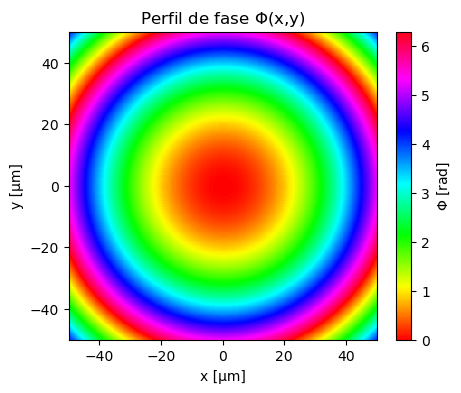

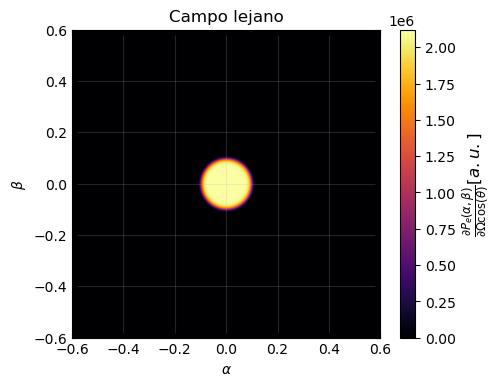

In [3]:
um = 1
mm = 1000*um
cm = 10000*um
w_alpha = np.sin(np.pi/30)
λ = 1.0*um
w_I = 200.0*um
n = 16


Nx = 2048*2
Ny = 2048*2

extent_r = 600*um
extent_x = extent_y = 1200*um

def target_fun(sinθ):
    return np.exp(-2*(((sinθ)/w_alpha))**n)

def input_fun(r):
    E = (np.where(r< extent_r,  np.exp(-(r**2)/(w_I**2)), 0))
    return E**2


Φ_fun,target_scale = get_MA_farfield_phase_fun(input_fun, target_fun, extent_r, λ)


def target_fun(sinθ):
    return target_scale*np.exp(-2*(((sinθ)/w_alpha))**n)




######################################################

dx = extent_x/Nx
dy = extent_y/Ny
x = dx*(np.arange(Nx)-Nx//2)
y = dy*(np.arange(Ny)-Ny//2)
xx, yy = np.meshgrid(x, y)
rr = np.sqrt(xx**2 +  yy**2)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(Φ_fun(rr)%(2*np.pi), cmap ='hsv', origin = 'lower', interpolation  = 'none', extent = [xx[0,0], xx[0,-1],yy[0,0], yy[-1,0]], vmax = 2*np.pi, vmin = 0)
ax.set_title(r"Perfil de fase $\Phi$(x,y)")
ax.set_ylabel("y [μm]")
ax.set_xlabel("x [μm]")
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
cb1 = fig.colorbar(im, orientation = 'vertical',fraction=0.045, label = '$\Phi$ [rad]')
plt.show()


#####################################################



E = np.sqrt(input_fun(rr))*np.exp(1j*(Φ_fun(rr)  ))

α, β, Irad = get_farfield_radiant_intensity_percos_scalar(x, y, E,λ)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(2*np.abs(Irad), origin = 'lower', cmap ='inferno',    extent = [α[0],α[-1],β[0],β[-1]])
ax.set_xlabel('$α$')
ax.set_ylabel("$β$")
ax.set_title(r"Campo lejano")
ax.set_xlabel('$α$')
ax.set_ylabel("$β$")
plt.grid(alpha =0.2)
ax.tick_params(axis='both', which="both", direction="in",right=True, top=True,)
ax.set_xlim([-0.6, 0.6])
ax.set_ylim([-0.6, 0.6])

cb1 = fig.colorbar(im, orientation = 'vertical')
cb1.set_label(r"$\frac{\partial P_e(α,β)}{\partial \Omega \cos(\theta)} [a.u.]$", size= 12)


plt.show()



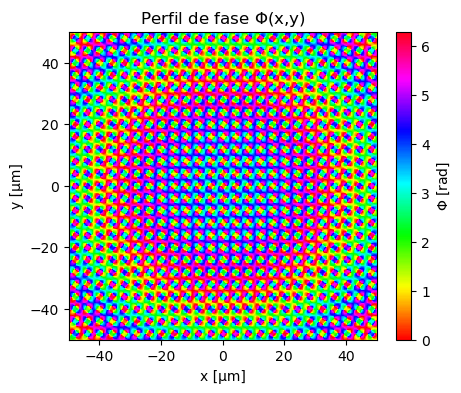

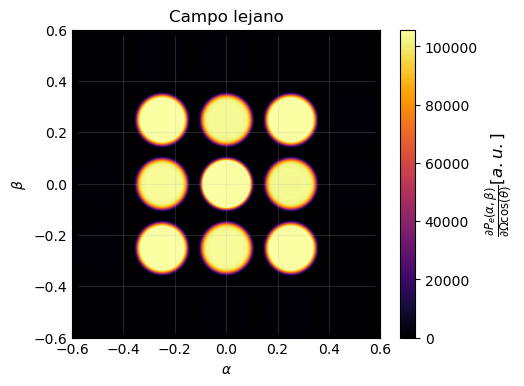

In [7]:
from scipy.interpolate import interpn

grating_phase = np.load('grating_phase_square-GS_xy.npy')
a=4
Λx = a
Λy = a
Ny_old,Nx_old = grating_phase.shape
x_old = jnp.linspace(0, Λx, Nx_old)
y_old = jnp.linspace(0, Λy, Ny_old)
Ny, Nx = 4000,4000
extent_x = 1000
extent_y = 1000
dx = extent_x/Nx
dy = extent_y/Ny
x = dx * (jnp.arange(Nx)-Nx//2)
y = dy * (jnp.arange(Ny)-Ny//2)
xx, yy = jnp.meshgrid(x, y)
rr = np.sqrt(xx**2 +  yy**2)
oldpoints = (x_old,y_old)
newpoints = np.vstack([(xx%Λx).ravel(),(yy%Λy).ravel()]).T
combined_phase = jnp.arctan2( interpn(oldpoints, np.sin(grating_phase).T, newpoints, bounds_error=True, fill_value = 0, method = 'linear').reshape((Ny, Nx))   ,   interpn(oldpoints, np.cos(grating_phase).T, newpoints, bounds_error=True, fill_value = None, method = 'linear').reshape((Ny, Nx))  )
combined_phase += Φ_fun(rr)


fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(combined_phase%(2*np.pi), cmap ='hsv', origin = 'lower', interpolation  = 'none', extent = [xx[0,0], xx[0,-1],yy[0,0], yy[-1,0]], vmax = 2*np.pi, vmin = 0)
ax.set_title(r"Perfil de fase $\Phi$(x,y)")
ax.set_ylabel("y [μm]")
ax.set_xlabel("x [μm]")
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
cb1 = fig.colorbar(im, orientation = 'vertical',fraction=0.045, label = '$\Phi$ [rad]')
plt.show()



E = np.sqrt(input_fun(rr)) * jnp.exp(1j*combined_phase)
α, β, Irad = get_farfield_radiant_intensity_percos_scalar(x, y, E,λ)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(np.abs(Irad), origin = 'lower', cmap ='inferno',    extent = [α[0],α[-1],β[0],β[-1]], vmax =  (0.8 * Irad.max()))
ax.set_xlabel('$α$')
ax.set_ylabel("$β$")
ax.set_title(r"Campo lejano")
ax.set_xlabel('$α$')
ax.set_ylabel("$β$")
plt.grid(alpha =0.2)
ax.tick_params(axis='both', which="both", direction="in",right=True, top=True,)
ax.set_xlim([-0.6, 0.6])
ax.set_ylim([-0.6, 0.6])

cb1 = fig.colorbar(im, orientation = 'vertical')
cb1.set_label(r"$\frac{\partial P_e(α,β)}{\partial \Omega \cos(\theta)} [a.u.]$", size= 12)


plt.show()

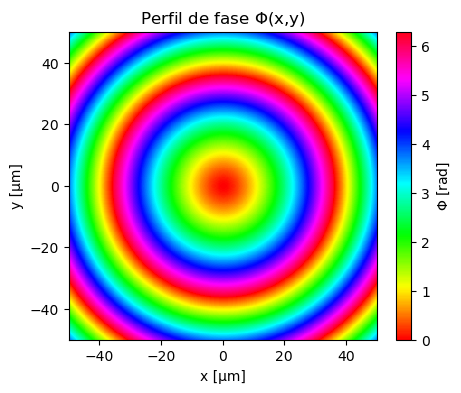

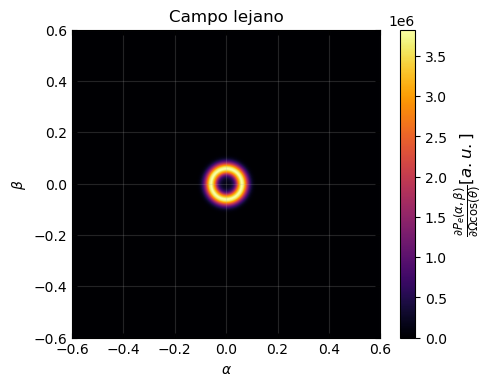

In [34]:
um = 1
mm = 1000*um
cm = 10000*um
w_alpha = np.sin(np.pi/90)
λ = 1.0*um
w_I = 200.0*um
n = 2


Nx = 2048*2
Ny = 2048*2

extent_r = 600*um
extent_x = extent_y = 1200*um

def target_fun(sinθ):
    return np.exp(-2*(((np.abs(sinθ)-0.06)/w_alpha))**n)

def input_fun(r):
    E = (np.where(r< extent_r,  np.exp(-(r**2)/(w_I**2)), 0))
    return E**2


Φ_fun,target_scale = get_MA_farfield_phase_fun(input_fun, target_fun, extent_r, λ)


def target_fun(sinθ):
    return target_scale*np.exp(-2*(((sinθ)/w_alpha))**n)




######################################################

dx = extent_x/Nx
dy = extent_y/Ny
x = dx*(np.arange(Nx)-Nx//2)
y = dy*(np.arange(Ny)-Ny//2)
xx, yy = np.meshgrid(x, y)
rr = np.sqrt(xx**2 +  yy**2)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(Φ_fun(rr)%(2*np.pi), cmap ='hsv', origin = 'lower', interpolation  = 'none', extent = [xx[0,0], xx[0,-1],yy[0,0], yy[-1,0]], vmax = 2*np.pi, vmin = 0)
ax.set_title(r"Perfil de fase $\Phi$(x,y)")
ax.set_ylabel("y [μm]")
ax.set_xlabel("x [μm]")
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
cb1 = fig.colorbar(im, orientation = 'vertical',fraction=0.045, label = '$\Phi$ [rad]')
plt.show()


#####################################################



E = np.sqrt(input_fun(rr))*np.exp(1j*(Φ_fun(rr)  ))

α, β, Irad = get_farfield_radiant_intensity_percos_scalar(x, y, E,λ)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(2*np.abs(Irad), origin = 'lower', cmap ='inferno',    extent = [α[0],α[-1],β[0],β[-1]])
ax.set_xlabel('$α$')
ax.set_ylabel("$β$")
ax.set_title(r"Campo lejano")
ax.set_xlabel('$α$')
ax.set_ylabel("$β$")
plt.grid(alpha =0.2)
ax.tick_params(axis='both', which="both", direction="in",right=True, top=True,)
ax.set_xlim([-0.6, 0.6])
ax.set_ylim([-0.6, 0.6])

cb1 = fig.colorbar(im, orientation = 'vertical')
cb1.set_label(r"$\frac{\partial P_e(α,β)}{\partial \Omega \cos(\theta)} [a.u.]$", size= 12)


plt.show()



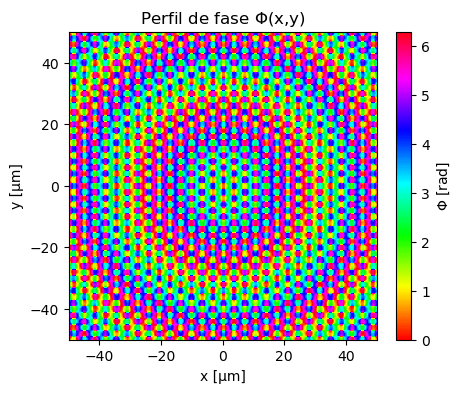

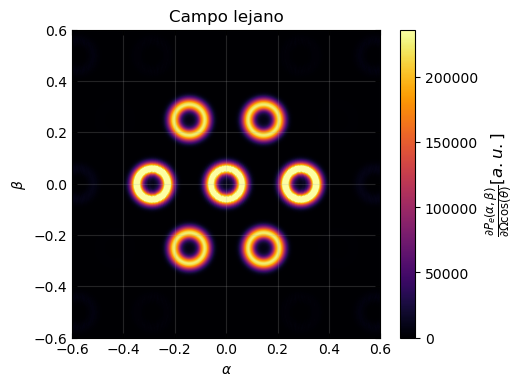

In [37]:
from scipy.interpolate import interpn

grating_phase = np.load('grating_phase_triangle-GS_xy.npy')
a=4
Λx = 2*a*np.cos(30/180*np.pi)
Λy = 2*a*np.sin(30/180*np.pi)
Ny_old,Nx_old = grating_phase.shape
x_old = jnp.linspace(0, Λx, Nx_old)
y_old = jnp.linspace(0, Λy, Ny_old)
Ny, Nx = 4000,4000
extent_x = 1000
extent_y = 1000
dx = extent_x/Nx
dy = extent_y/Ny
x = dx * (jnp.arange(Nx)-Nx//2)
y = dy * (jnp.arange(Ny)-Ny//2)
xx, yy = jnp.meshgrid(x, y)
rr = np.sqrt(xx**2 +  yy**2)
oldpoints = (x_old,y_old)
newpoints = np.vstack([(xx%Λx).ravel(),(yy%Λy).ravel()]).T
combined_phase = jnp.arctan2( interpn(oldpoints, np.sin(grating_phase).T, newpoints, bounds_error=True, fill_value = 0, method = 'linear').reshape((Ny, Nx))   ,   interpn(oldpoints, np.cos(grating_phase).T, newpoints, bounds_error=True, fill_value = None, method = 'linear').reshape((Ny, Nx))  )
combined_phase += Φ_fun(rr)


fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(combined_phase%(2*np.pi), cmap ='hsv', origin = 'lower', interpolation  = 'none', extent = [xx[0,0], xx[0,-1],yy[0,0], yy[-1,0]], vmax = 2*np.pi, vmin = 0)
ax.set_title(r"Perfil de fase $\Phi$(x,y)")
ax.set_ylabel("y [μm]")
ax.set_xlabel("x [μm]")
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
cb1 = fig.colorbar(im, orientation = 'vertical',fraction=0.045, label = '$\Phi$ [rad]')
plt.show()



E = np.sqrt(input_fun(rr)) * jnp.exp(1j*combined_phase)
α, β, Irad = get_farfield_radiant_intensity_percos_scalar(x, y, E,λ)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(np.abs(Irad), origin = 'lower', cmap ='inferno',    extent = [α[0],α[-1],β[0],β[-1]], vmax =  (0.8 * Irad.max()))
ax.set_xlabel('$α$')
ax.set_ylabel("$β$")
ax.set_title(r"Campo lejano")
ax.set_xlabel('$α$')
ax.set_ylabel("$β$")
plt.grid(alpha =0.2)
ax.tick_params(axis='both', which="both", direction="in",right=True, top=True,)
ax.set_xlim([-0.6, 0.6])
ax.set_ylim([-0.6, 0.6])

cb1 = fig.colorbar(im, orientation = 'vertical')
cb1.set_label(r"$\frac{\partial P_e(α,β)}{\partial \Omega \cos(\theta)} [a.u.]$", size= 12)


plt.show()